In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Titanic_train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Part 1**

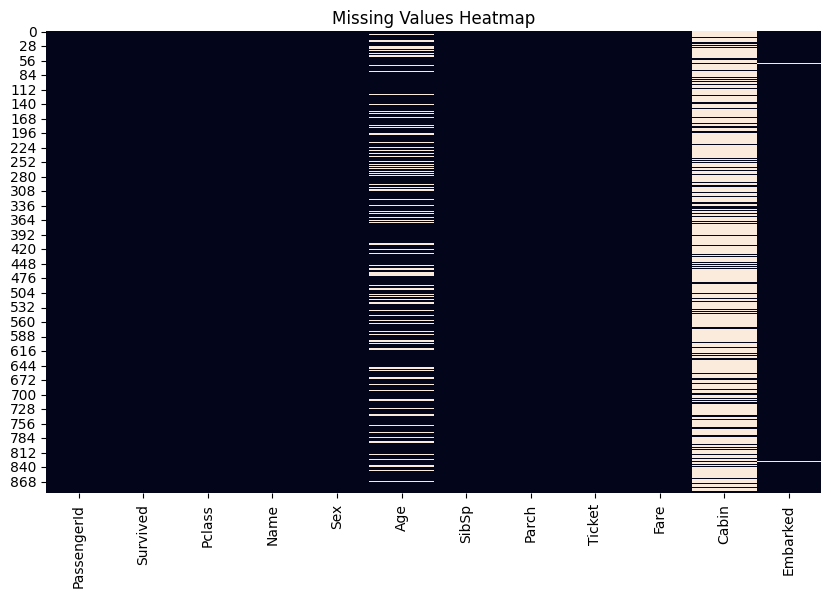

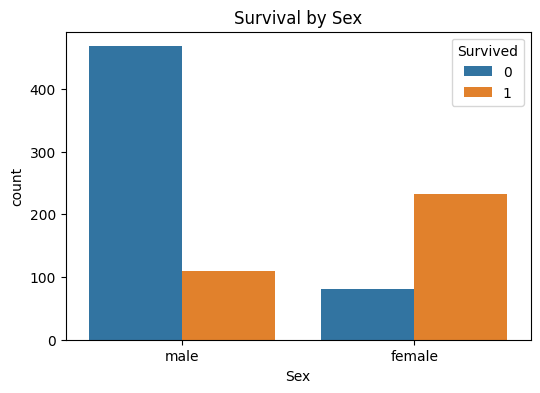

Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 



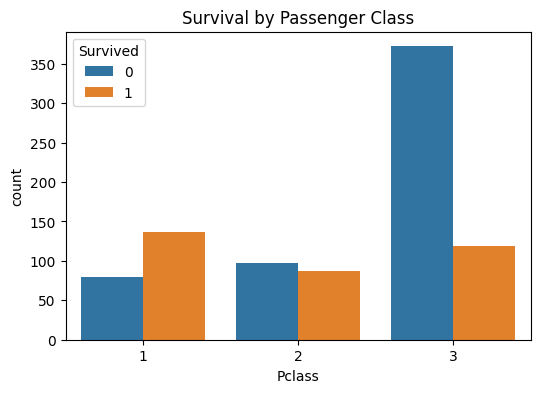

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 



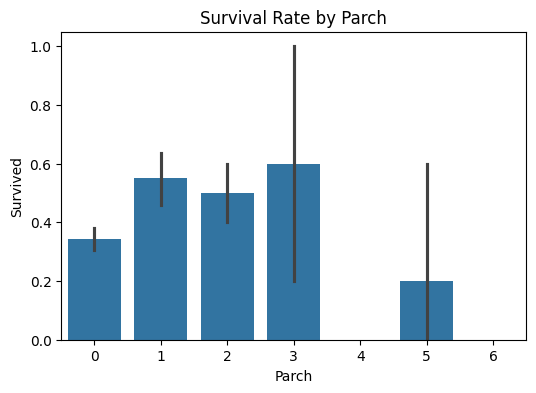

Survival Rate by Parch:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64 



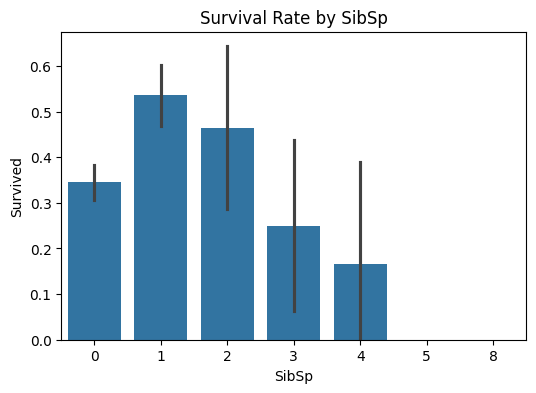

Survival Rate by SibSp:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64 



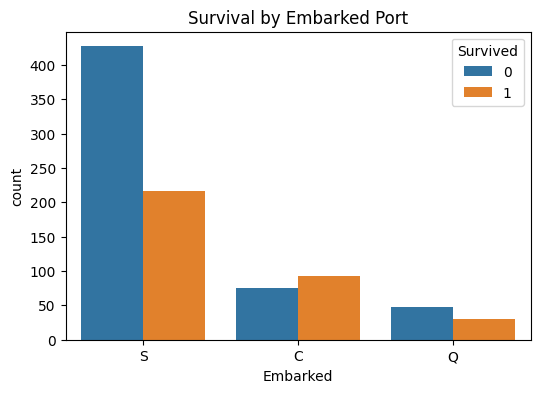

Survival Rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 



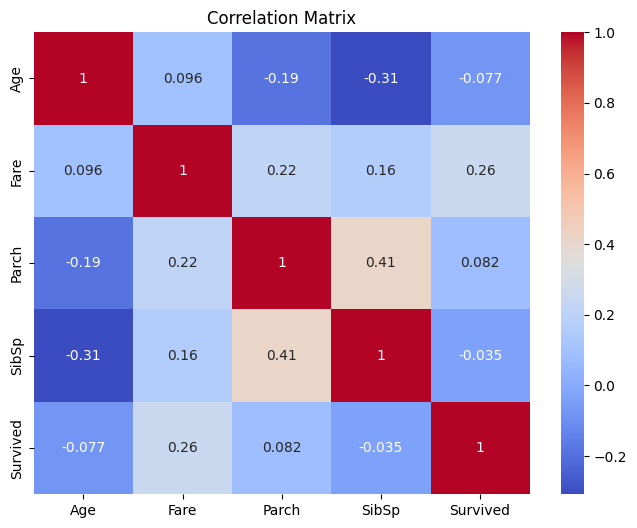

In [ ]:
# 1. Missing data heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 2. Survival by Sex

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.show()

print("Survival Rate by Sex:")
print(df.groupby("Sex")["Survived"].mean(), "\n")

# 3. Survival by Pclass

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()

print("Survival Rate by Pclass:")
print(df.groupby("Pclass")["Survived"].mean(), "\n")

# 4. Survival by Parch

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Parch", y="Survived")
plt.title("Survival Rate by Parch")
plt.show()

print("Survival Rate by Parch:")
print(df.groupby("Parch")["Survived"].mean(), "\n")

# 5. Survival by SibSp
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="SibSp", y="Survived")
plt.title("Survival Rate by SibSp")
plt.show()

print("Survival Rate by SibSp:")
print(df.groupby("SibSp")["Survived"].mean(), "\n")

# 6. Survival by Embarked

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival by Embarked Port")
plt.show()

print("Survival Rate by Embarked:")
print(df.groupby("Embarked")["Survived"].mean(), "\n")

# 7. Correlation Heatmap (numeric columns)

numeric_df = df[["Age", "Fare", "Parch", "SibSp", "Survived"]]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The features most correlated with survival are Sex, Pclass, and Fare. Women and 1st-class passengers survived much more often, making these the strongest predictors. Fare has a moderate positive correlation (wealthier passengers survived more). Numerical variables like Age, Parch, and SibSp show only weak correlations on their own, although small families tend to survive more than people alone or in large groups.

# **Part 2**